In [1]:
import collections.abc

#hyper needs the four following aliases to be done manually.
collections.Iterable = collections.abc.Iterable
collections.Mapping = collections.abc.Mapping
collections.MutableSet = collections.abc.MutableSet
collections.MutableMapping = collections.abc.MutableMapping
from os import path
import os
import numpy as np
#import pandas as pd
import pickle
import mne
import matplotlib.pyplot as plt

In [2]:
def from_pickle(path):
    with open(path, 'rb') as f:
        obj = pickle.load(f)
    return obj

In [3]:
path_raw_EEG = 'C:\\Users\\chedl\\OneDrive\\Bureau\\EMSE\\3A\\PE\\privateData\\EEG_MAHNOB_Dictinary.p'
path_raw_data = 'C:\\Users\\chedl\\OneDrive\\Bureau\\EMSE\\3A\\PE\\privateData'
all_eeg = from_pickle(path_raw_EEG)
meta = from_pickle(path.join(path_raw_data, "Metadata_dict.p"))
labels = from_pickle(path.join(path_raw_data, "Label_Dict.p"))

In [4]:
EEG_channels = ['Fp1', 'AF3', 'F3', 'F7', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'P3',
                'P7', 'PO3', 'O1', 'Oz', 'Pz', 'Fp2', 'AF4', 'Fz', 'F4', 'F8', 'FC6',
                'FC2', 'Cz', 'C4', 'T8', 'CP6', 'CP2', 'P4', 'P8', 'PO4', 'O2']

In [ ]:
labels

In [7]:
file_path = "C:\\Users\\chedl\\OneDrive\\Bureau\\EMSE\\3A\\PE\\essai\\2\\recording_132_raw.edf"
raw = mne.io.read_raw_edf(file_path)

Extracting EDF parameters from C:\Users\chedl\OneDrive\Bureau\EMSE\3A\PE\essai\2\recording_132_raw.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [7]:
my_annot = mne.Annotations(onset=[0],  # in seconds
                           duration=[120],  # in seconds, too
                           description=[str(labels[132])])
print(my_annot)

<Annotations | 1 segment: [3. 5.] (1)>


In [8]:
raw.set_annotations(my_annot)

<RawEDF | recording_132_raw.edf, 32 x 37632 (147.0 s), ~34 kB, data not loaded>

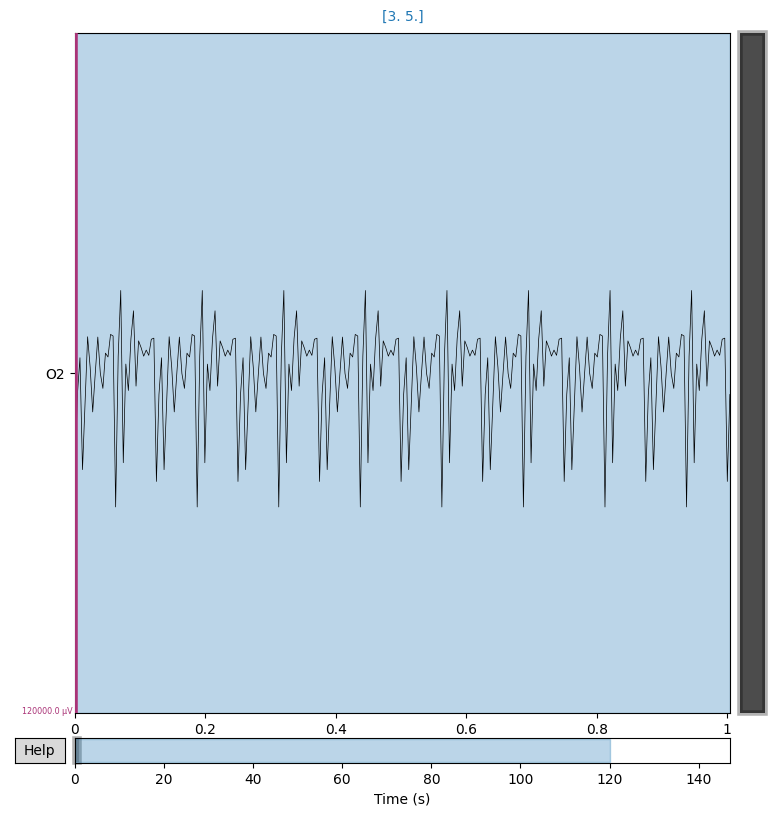

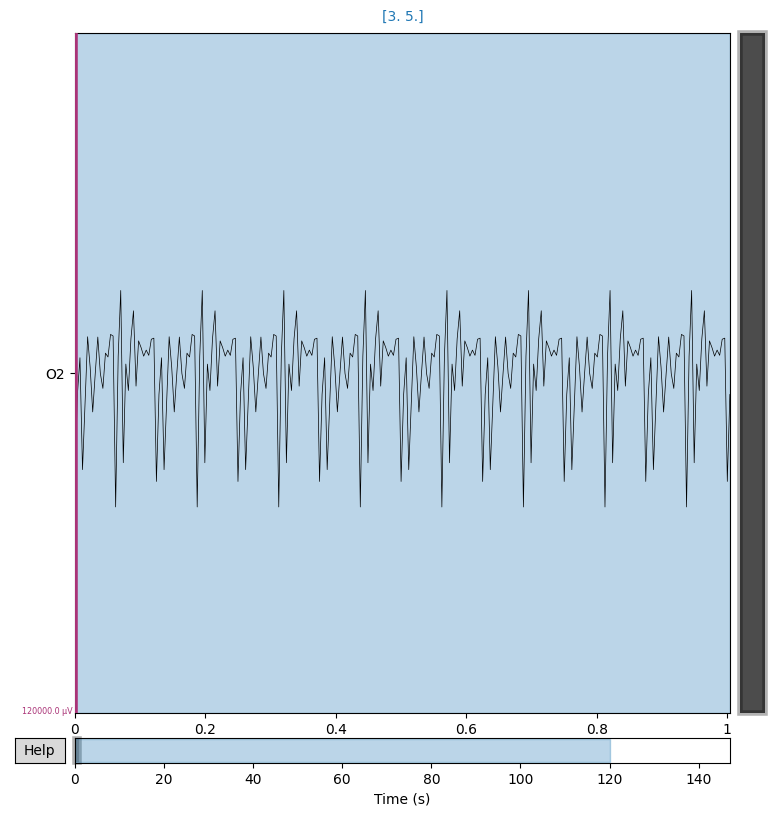

In [12]:
eeg_data_ch = raw.copy().pick_channels(['O2'])
eeg_data_ch.plot( start=0, duration=1, scalings={'eeg': 60e-3})

In [15]:
raw.export('my_annotated_eeg_data.edf')

Reading 0 ... 37631  =      0.000 ...   146.996 secs...
